In [1]:
from __future__ import print_function
import numpy as np
from numpy import distutils

from keras.preprocessing import sequence
from keras.losses import categorical_crossentropy
from keras.models import model_from_json
import glob
import os
import re
from collections import OrderedDict
from nltk.corpus import stopwords
import _pickle as pkl
from keras import optimizers , utils
from gensim.models.word2vec import Word2Vec
from gensim.corpora.dictionary import Dictionary
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, merge,Conv1D,MaxPooling1D , Activation
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
json_file = open('model_15.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_15.h5")
print("Loaded model from disk")

Loaded model from disk


In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

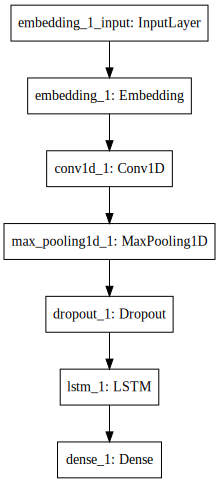

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils.visualize_util import plot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
import keras.backend as K
get_LSTM_output = K.function([model.layers[0].input],
                             [model.layers[0].output])

In [13]:
get_LSTM_output

In [12]:
print('Training')
for i in range(15):
    print('Epoch', i, '/', 15)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              nb_epoch=1,
              shuffle=False)

    for layer in model.layers:
        if 'LSTM' in str(layer):
            print('states[0] = {}'.format(K.get_value(layer.states[0])))
            print('states[1] = {}'.format(K.get_value(layer.states[1])))

            print('Input')
            print('b_i = {}'.format(K.get_value(layer.b_i)))
            print('W_i = {}'.format(K.get_value(layer.W_i)))
            print('U_i = {}'.format(K.get_value(layer.U_i)))

            print('Forget')
            print('b_f = {}'.format(K.get_value(layer.b_f)))
            print('W_f = {}'.format(K.get_value(layer.W_f)))
            print('U_f = {}'.format(K.get_value(layer.U_f)))

            print('Cell')
            print('b_c = {}'.format(K.get_value(layer.b_c)))
            print('W_c = {}'.format(K.get_value(layer.W_c)))
            print('U_c = {}'.format(K.get_value(layer.U_c)))

            print('Output')
            print('b_o = {}'.format(K.get_value(layer.b_o)))
            print('W_o = {}'.format(K.get_value(layer.W_o)))
            print('U_o = {}'.format(K.get_value(layer.U_o)))

    # output of the first batch value of the batch after the first fit().
    first_batch_element = np.expand_dims(cos[0], axis=1)  # (1, 1) to (1, 1, 1)
    print('output = {}'.format(get_LSTM_output([first_batch_element])[0].flatten()))

    model.reset_states()

print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Ploting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()

Training
Epoch 0 / 15


NameError: name 'cos' is not defined